### Comparing Bismark alignments from two WGBS samples with and without crude trimming and how they relate to _P.generosa_ genome-wide CpG coverage

##### Variables to be set by user

Re: two "work_dir" variables -
Both are needed, as one is needed by Bash and the other by Python (respectively)

In [2]:
%env work_dir = /Users/strigg/Documents/GitHub/Shelly_Pgenerosa/analyses/WGBS_conditionedBroodstockHemolymph/20190503_coverage_analysis
work_dir = "/Users/strigg/Documents/GitHub/Shelly_Pgenerosa/analyses/WGBS_conditionedBroodstockHemolymph/20190503_coverage_analysis"
output_plot = "20190503_Pgenr_cov_comparison.png"

env: work_dir=/Users/strigg/Documents/GitHub/Shelly_Pgenerosa/analyses/WGBS_conditionedBroodstockHemolymph/20190503_coverage_analysis


##### Import necessary modules

In [3]:
import pandas
import os
import numpy
from IPython.display import display
import matplotlib.pyplot as plt

##### Make new working directory, download files and rename using wget ```--output-document``` argument

In [4]:
cd $work_dir

/Users/strigg/Documents/GitHub/Shelly_Pgenerosa/analyses/WGBS_conditionedBroodstockHemolymph/20190503_coverage_analysis


#### Loop through coverage files to calculate percent sequencing coverage for each Bismark subset

** had to unzip my files first (gunzip *CpG_report.txt.gz)

In [15]:
# Variable declaration
bismark_subset_list = []
mean_seq_coverage = []
percent_seq_coverage = []
percent_3x_seq_coverage = []
percent_5x_seq_coverage = []
percent_10x_seq_coverage = []

# Create list of coverage files in current directory

cov_files = !find /Volumes/web/metacarcinus/Pgenerosa/20190415_10K/*.CpG_report.txt
print(cov_files)

# Loop through coverage files
for file in cov_files:
    print("----------------------------------------------")
    print("----------------------------------------------")
    print (file)
    subset_name = file[:-4] # Remove file suffix (.txt)
    bismark_subset_list.append(subset_name)
    #
    #
    # Create dataframe and add column names (taken from Bismark documentation)
    dataframe = pandas.read_csv(
        file,
        sep='\t',
        header=None,
        names=["chrom", "pos", "strand", "meth", "unmeth", "C-context", "trinucleotide"])
    
    dataframe['coverage'] = dataframe['meth'] + dataframe['unmeth'] # Sum of methylated and unmethylated coverage for each position.
    
    total_CpG = len(dataframe) # Count of all CpGs in genome.
    
    
    coverage = sum(dataframe['coverage']>0) # Count of all CpG positions with sequence coverage
    coverage_3x = sum(dataframe['coverage']>=3)
    coverage_5x = sum(dataframe['coverage']>=5)
    coverage_10x = sum(dataframe['coverage']>=10)
    mean_coverage = round(dataframe["coverage"].mean(), 1)
    
    display("Total coverage: " + str(coverage))
    display("3x coverage: " + str(coverage_3x))
    display("5x coverage: " + str(coverage_5x))
    display("10x coverage: " + str(coverage_10x))
    display("Mean coverage: " + str(mean_coverage))
    
    no_coverage = sum(dataframe['coverage']==0) # Count of all CpG posiitions with no sequence coverage
    percent_coverage = round((coverage / total_CpG * 100.0), 1) # Rounds to 1 decimal
    percent_3x_coverage = round((coverage_3x / total_CpG * 100.0), 1) # Rounds to 1 decimal
    percent_5x_coverage = round((coverage_5x / total_CpG * 100.0), 1) # Rounds to 1 decimal
    percent_10x_coverage = round((coverage_10x / total_CpG * 100.0), 1) # Rounds to 1 decimal
    
    mean_seq_coverage.append(mean_coverage)
    percent_seq_coverage.append(percent_coverage)
    percent_3x_seq_coverage.append(percent_3x_coverage)
    percent_5x_seq_coverage.append(percent_5x_coverage)
    percent_10x_seq_coverage.append(percent_10x_coverage)
    
    display("No coverage: " + str(no_coverage))
    display("Percent coverage: " + str(percent_coverage))
    display("Percent 3x coverage: " + str(percent_3x_coverage))
    display("Percent 5x coverage: " + str(percent_5x_coverage))
    display("Percent 10x coverage: " + str(percent_10x_coverage))
    display(dataframe.head())

['/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank2-025-026_cytosine_CpG_cov_report.CpG_report.txt', '/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank2-025-026_trim_cytosine_CpG_cov_report.CpG_report.txt', '/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank3-15-16_cytosine_CpG_cov_report.CpG_report.txt', '/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank3-15-16_trim_cytosine_CpG_cov_report.CpG_report.txt']
----------------------------------------------
----------------------------------------------
/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank2-025-026_cytosine_CpG_cov_report.CpG_report.txt


'Total coverage: 37135668'

'3x coverage: 24908042'

'5x coverage: 13436327'

'10x coverage: 2375356'

'Mean coverage: 3.6'

'No coverage: 11040954'

'Percent coverage: 77.1'

'Percent 3x coverage: 51.7'

'Percent 5x coverage: 27.9'

'Percent 10x coverage: 4.9'

chrom  pos strand  meth  unmeth  \
0  PGA_scaffold1__77_contigs__length_89643857    4      +     0       1   
1  PGA_scaffold1__77_contigs__length_89643857    5      -     0       0   
2  PGA_scaffold1__77_contigs__length_89643857   18      +     0       1   
3  PGA_scaffold1__77_contigs__length_89643857   19      -     0       0   
4  PGA_scaffold1__77_contigs__length_89643857   54      +     0       1   

  C-context trinucleotide  coverage  
0        CG           CGC         1  
1        CG           CGC         0  
2        CG           CGG         1  
3        CG           CGG         0  
4        CG           CGT         1

----------------------------------------------
----------------------------------------------
/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank2-025-026_trim_cytosine_CpG_cov_report.CpG_report.txt


'Total coverage: 34605633'

'3x coverage: 18676350'

'5x coverage: 7733102'

'10x coverage: 1082497'

'Mean coverage: 2.6'

'No coverage: 13570989'

'Percent coverage: 71.8'

'Percent 3x coverage: 38.8'

'Percent 5x coverage: 16.1'

'Percent 10x coverage: 2.2'

chrom  pos strand  meth  unmeth  \
0  PGA_scaffold1__77_contigs__length_89643857    4      +     0       0   
1  PGA_scaffold1__77_contigs__length_89643857    5      -     1       0   
2  PGA_scaffold1__77_contigs__length_89643857   18      +     0       1   
3  PGA_scaffold1__77_contigs__length_89643857   19      -     1       0   
4  PGA_scaffold1__77_contigs__length_89643857   54      +     0       1   

  C-context trinucleotide  coverage  
0        CG           CGC         0  
1        CG           CGC         1  
2        CG           CGG         1  
3        CG           CGG         1  
4        CG           CGT         1

----------------------------------------------
----------------------------------------------
/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank3-15-16_cytosine_CpG_cov_report.CpG_report.txt


'Total coverage: 35240668'

'3x coverage: 20301942'

'5x coverage: 9022441'

'10x coverage: 1266479'

'Mean coverage: 2.8'

'No coverage: 12935954'

'Percent coverage: 73.1'

'Percent 3x coverage: 42.1'

'Percent 5x coverage: 18.7'

'Percent 10x coverage: 2.6'

chrom  pos strand  meth  unmeth  \
0  PGA_scaffold1__77_contigs__length_89643857    4      +     0       0   
1  PGA_scaffold1__77_contigs__length_89643857    5      -     0       0   
2  PGA_scaffold1__77_contigs__length_89643857   18      +     0       1   
3  PGA_scaffold1__77_contigs__length_89643857   19      -     0       0   
4  PGA_scaffold1__77_contigs__length_89643857   54      +     0       1   

  C-context trinucleotide  coverage  
0        CG           CGC         0  
1        CG           CGC         0  
2        CG           CGG         1  
3        CG           CGG         0  
4        CG           CGT         1

----------------------------------------------
----------------------------------------------
/Volumes/web/metacarcinus/Pgenerosa/20190415_10K/Tank3-15-16_trim_cytosine_CpG_cov_report.CpG_report.txt


'Total coverage: 32124743'

'3x coverage: 14065848'

'5x coverage: 4647417'

'10x coverage: 559888'

'Mean coverage: 2.0'

'No coverage: 16051879'

'Percent coverage: 66.7'

'Percent 3x coverage: 29.2'

'Percent 5x coverage: 9.6'

'Percent 10x coverage: 1.2'

chrom  pos strand  meth  unmeth  \
0  PGA_scaffold1__77_contigs__length_89643857    4      +     0       0   
1  PGA_scaffold1__77_contigs__length_89643857    5      -     0       0   
2  PGA_scaffold1__77_contigs__length_89643857   18      +     0       1   
3  PGA_scaffold1__77_contigs__length_89643857   19      -     0       0   
4  PGA_scaffold1__77_contigs__length_89643857   54      +     0       1   

  C-context trinucleotide  coverage  
0        CG           CGC         0  
1        CG           CGC         0  
2        CG           CGG         1  
3        CG           CGG         0  
4        CG           CGT         1

#### Create new dataframe

In [16]:
coverage_dataframe = pandas.DataFrame(
    {
        'Bismark Sample': ['Tank2-025-026','Tank2-025-026_trim','Tank3-15-16','Tank3-15-16_trim'],
        'Mean Coverage': mean_seq_coverage,
        'Percent Coverage': percent_seq_coverage,
        'Percent 3x Coverage': percent_3x_seq_coverage,
        'Percent 5x Coverage': percent_5x_seq_coverage,
        'Percent 10x Coverage': percent_10x_seq_coverage,
        
    })

coverage_dataframe

Bismark Sample  Mean Coverage  Percent Coverage  Percent 3x Coverage  \
0       Tank2-025-026            3.6              77.1                 51.7   
1  Tank2-025-026_trim            2.6              71.8                 38.8   
2         Tank3-15-16            2.8              73.1                 42.1   
3    Tank3-15-16_trim            2.0              66.7                 29.2   

   Percent 5x Coverage  Percent 10x Coverage  
0                 27.9                   4.9  
1                 16.1                   2.2  
2                 18.7                   2.6  
3                  9.6                   1.2

#### Create line plot overlayed on bar chart, showing percent sequencing coverage for each Bismark subset option

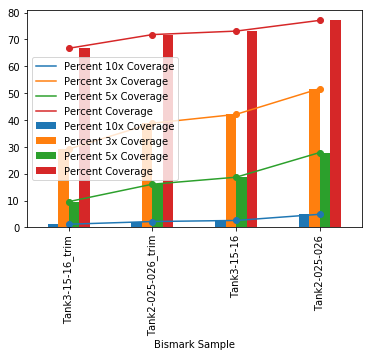

In [17]:
# Sort data
coverage_dataframe = coverage_dataframe.sort_values(by=['Percent Coverage'])


exclude = ['Mean Coverage']
coverage_dataframe = coverage_dataframe.loc[:, coverage_dataframe.columns.difference(exclude)] # Don't plot Mean Coverage
ax = coverage_dataframe.plot(x='Bismark Sample',marker='o') # Line plot with marker points.
coverage_dataframe.plot(kind='bar', x='Bismark Sample', ax=ax) # Overlays bar chart using axes defined in line plot

# Save figure to file.
# "bbox_inches" argument needed to prevent x asis lables from getting cut off.
plt.savefig(output_plot, bbox_inches = "tight")